In [ ]:
from google.colab import files


uploaded = files.upload()


Saving student-mat.csv to student-mat (1).csv


In [ ]:

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import io

data = pd.read_csv(io.BytesIO(uploaded['student-mat.csv']))
data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [ ]:
data['GAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3

In [ ]:
def define_grade(df):
    grades = []
    for row in df['GAvg']:
        if row >= (0.9 * df['GAvg'].max()):
            grades.append('A')
        elif row >= (0.7 * df['GAvg'].max()):
            grades.append('B')
        elif row < (0.7 * df['GAvg'].max()):
            grades.append('C')   
    df['grades'] = grades
    return df

In [ ]:
data = define_grade(data)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,C


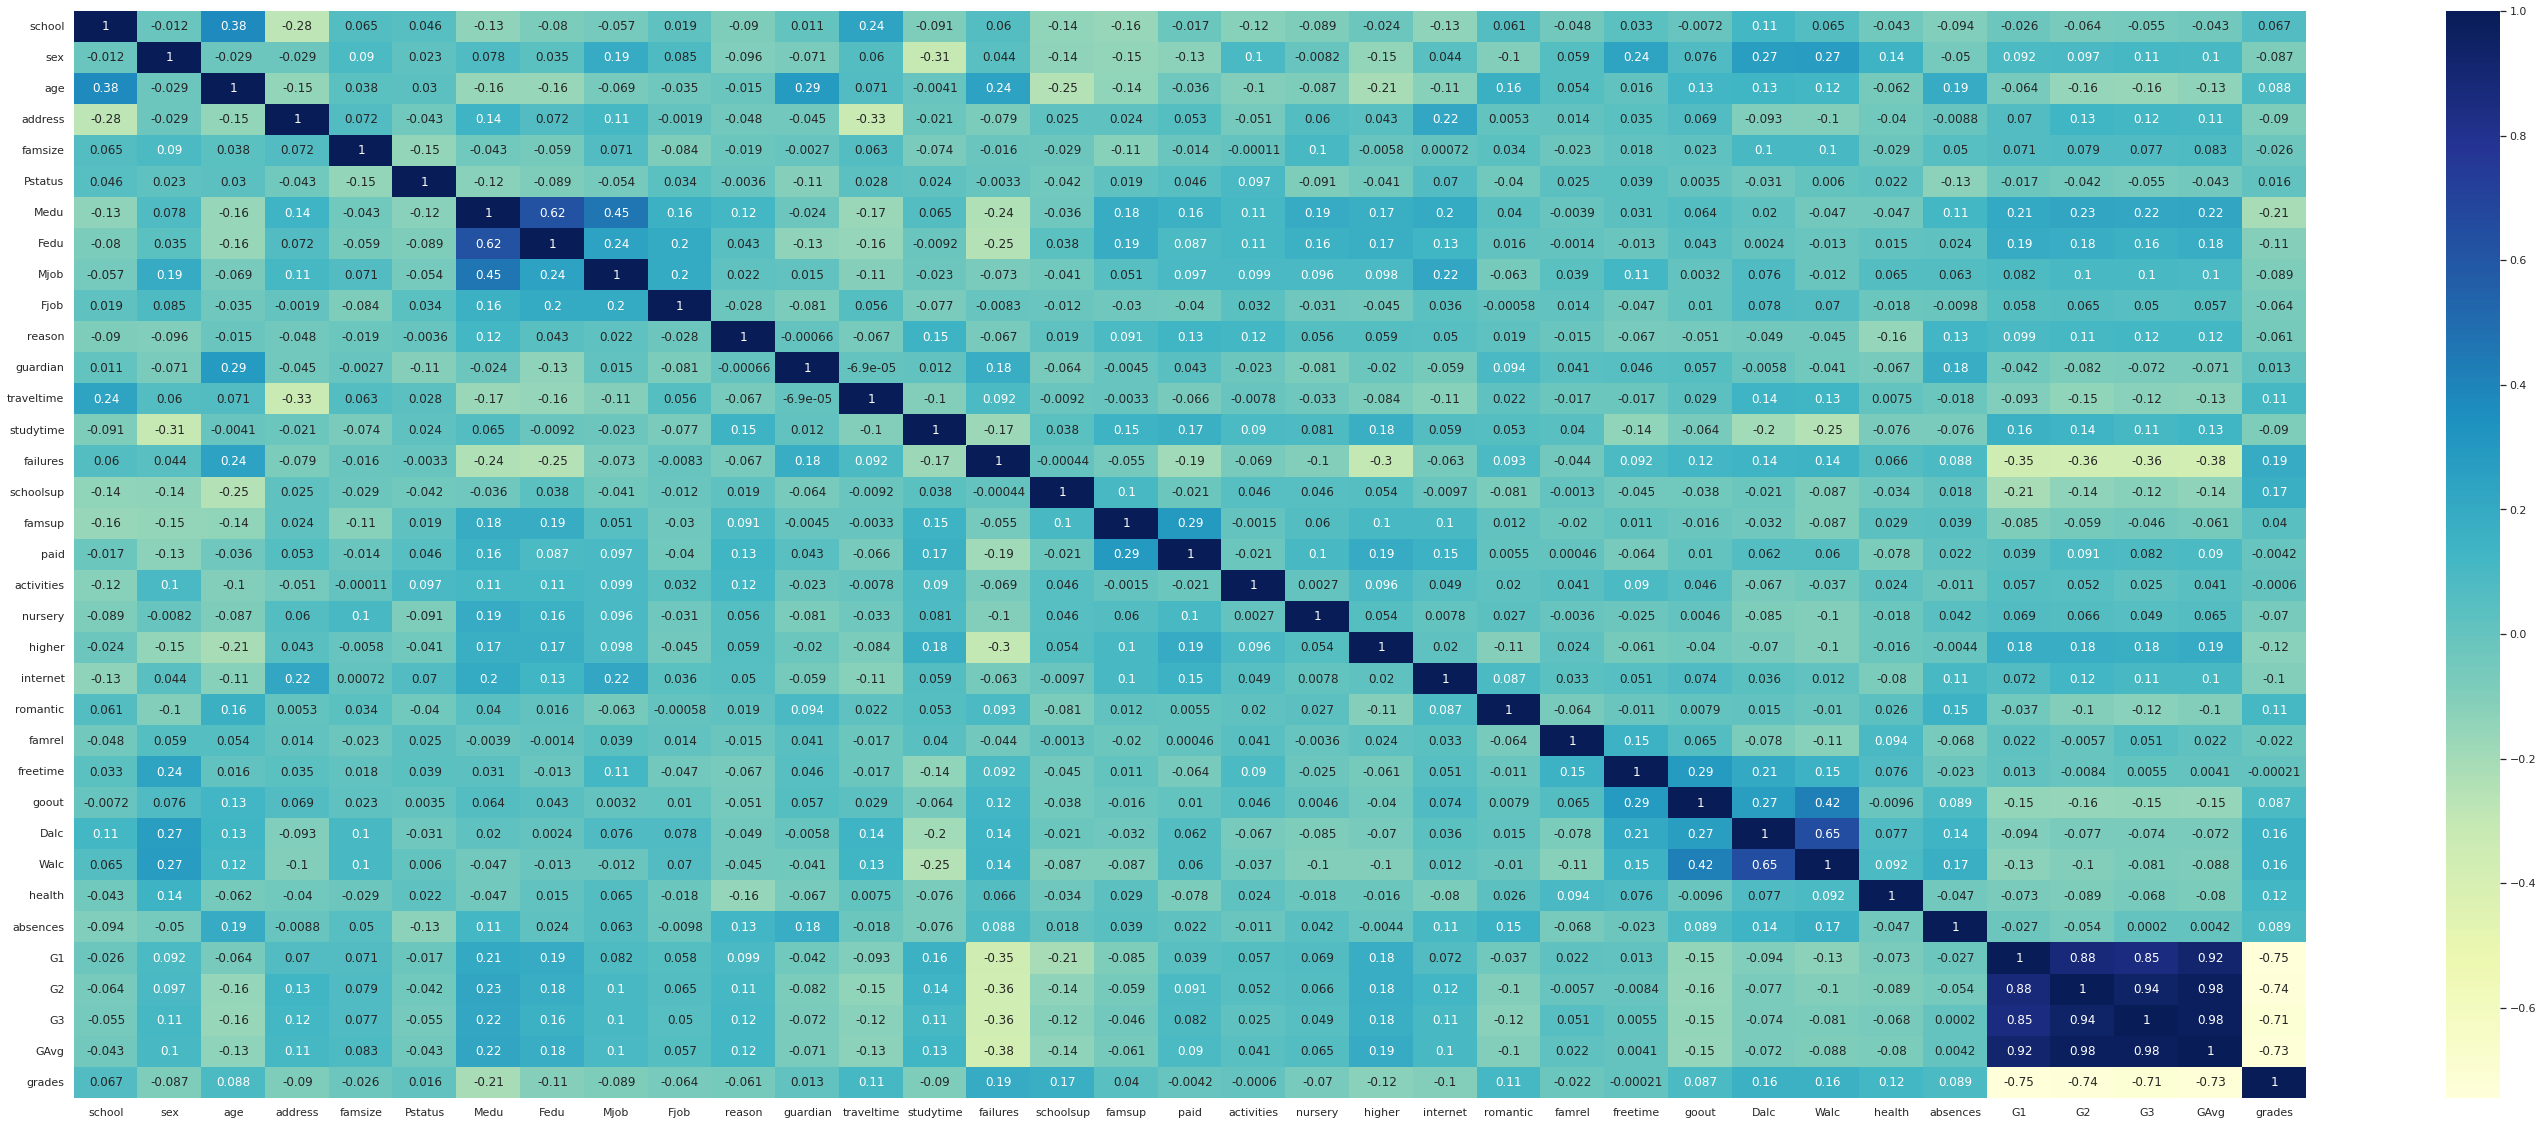

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu",annot=True)
sns.set(rc = {'figure.figsize':(50,20)})

sns.barplot(x=data['school'],y=data['GAvg'],data=data)

In [ ]:
data.drop(["school"], axis=1, inplace=True)

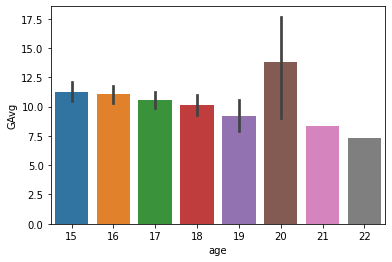

In [ ]:
sns.barplot(x=data['age'],y=data['GAvg'],data=data)

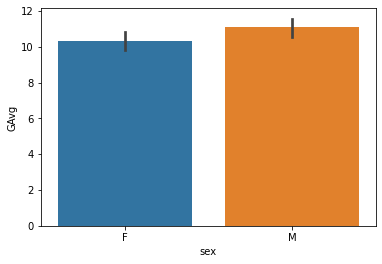

In [ ]:
sns.barplot(x=data['sex'],y=data['GAvg'],data=data)

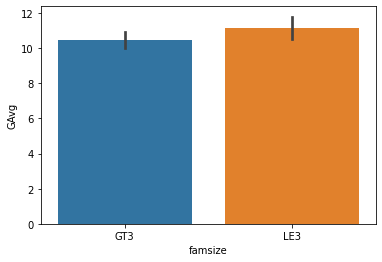

In [ ]:
sns.barplot(x=data['famsize'],y=data['GAvg'],data=data)

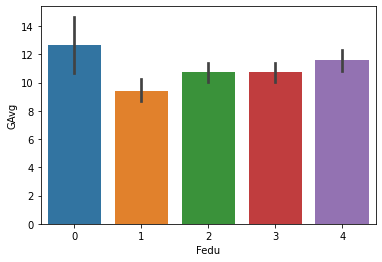

In [ ]:
sns.barplot(x=data['Fedu'],y=data['GAvg'],data=data)

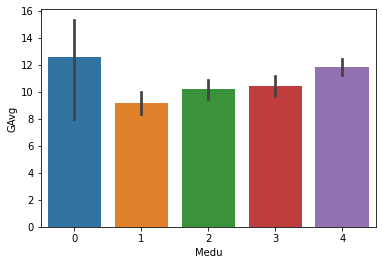

In [ ]:
sns.barplot(x=data['Medu'],y=data['GAvg'],data=data)

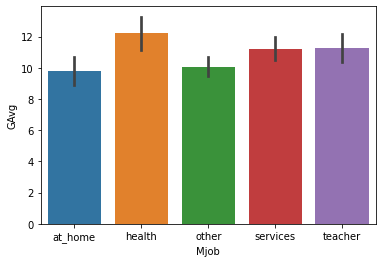

In [ ]:
sns.barplot(x=data['Mjob'],y=data['GAvg'],data=data)

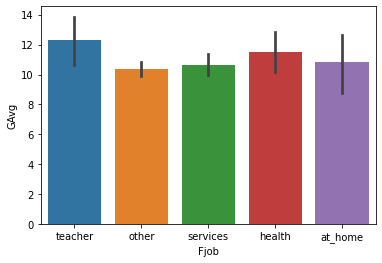

In [ ]:
sns.barplot(x=data['Fjob'],y=data['GAvg'],data=data)

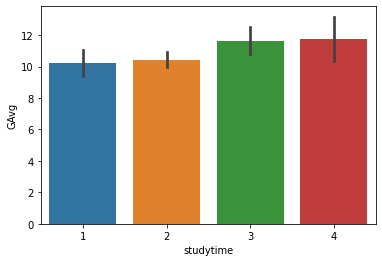

In [ ]:
sns.barplot(x=data['studytime'],y=data['GAvg'],data=data)

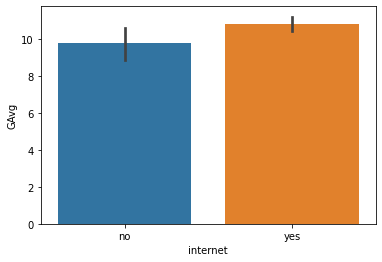

In [ ]:
sns.barplot(x=data['internet'],y=data['GAvg'],data=data)

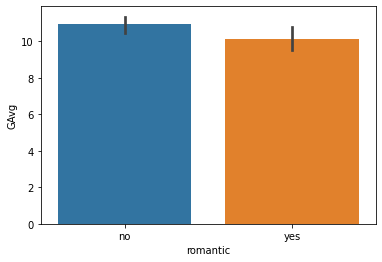

In [ ]:
sns.barplot(x=data['romantic'],y=data['GAvg'],data=data)

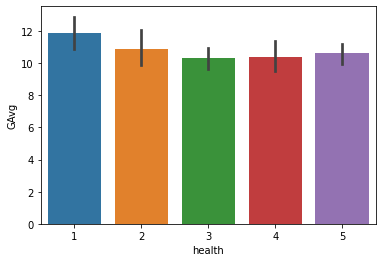

In [ ]:
sns.barplot(x=data['health'],y=data['GAvg'],data=data)

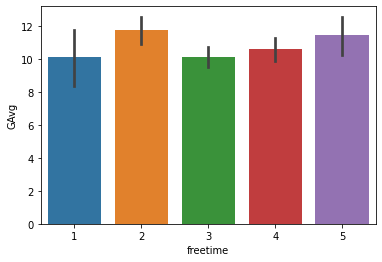

In [ ]:
sns.barplot(x=data['freetime'],y=data['GAvg'],data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


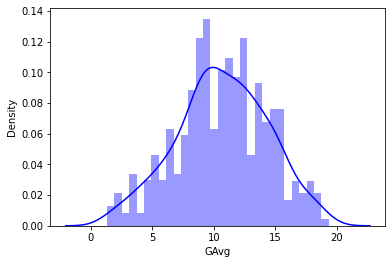

In [ ]:
sns.distplot(data['GAvg'], kde = True, color ='blue', bins = 30)

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [ ]:
#encoding the categorical features to numerical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(data.columns):
    data[i]=le.fit_transform(data[i])

In [ ]:
student_features = data.columns.tolist()
student_features.remove('grades') 
student_features.remove('GAvg') 
student_features.remove('G1') 
student_features.remove('G2') 
student_features.remove('G3') 
student_features

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [ ]:
X = data[student_features].copy()
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [ ]:
data[['grades']]

,grades
0,2
1,2
2,2
3,1
4,2
...,...
390,2
391,1
392,2
393,2


In [ ]:
y=data[['grades']].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [ ]:
list_scores=[]
list_models=[]
grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
grade_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=30, random_state=0)

In [ ]:
predictions = grade_classifier.predict(X_test)

In [ ]:
list_models.append("Decision tree")
list_scores.append(accuracy_score(y_true = y_test, y_pred = predictions))
accuracy_score(y_true = y_test, y_pred = predictions)

0.725

In [ ]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
pred2 = regr.predict(X_test)

In [ ]:
list_models.append("Random forest")
list_scores.append(accuracy_score(y_true = y_test, y_pred = pred2))
accuracy_score(y_true = y_test, y_pred = pred2)

0.8

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
pred3=neigh.predict(X_test)

In [ ]:
list_models.append("KNN")
list_scores.append(accuracy_score(y_true = y_test, y_pred = pred3))
accuracy_score(y_true = y_test, y_pred = pred3)

0.8

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
pred4=clf.predict(X_test)

In [ ]:
list_models.append("SVC")
list_scores.append(accuracy_score(y_true = y_test, y_pred = pred4))
accuracy_score(y_true = y_test, y_pred = pred4)

0.8

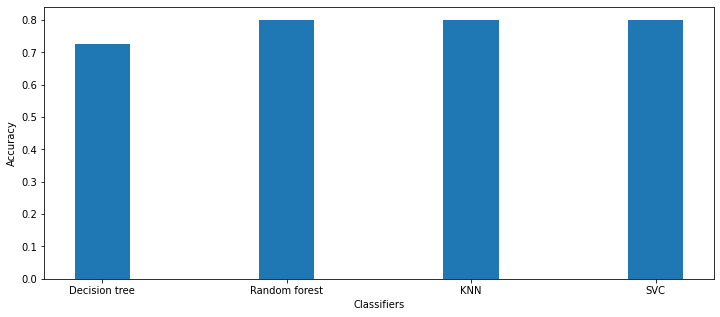

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores,width=0.3)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()